# Prosper Loan Data Exploration
## by Mostafa Wahdan

## Preliminary Wrangling

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) and a detailed description of all the features can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('.\data\prosperLoanData.csv')
pd.set_option("display.max_columns", len(loans.columns))
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
# high-level overview of data shape and composition
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# convert ProsperRating (Alpha) into ordered categorical types
# convert LoanStatus and EmploymentStatus to 
# ordered categorical types as well even though they're nominal not ordinal to
# gain consistency between different plots and have the same order

ordinal_var_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                    'LoanStatus': loans.LoanStatus.value_counts().sort_index().index,
                    'EmploymentStatus': loans.EmploymentStatus.value_counts().sort_index().index}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

### What is the structure of your dataset?

> The dataset is comprised of 81 features and 113937 records.

### What is the main feature of interest in your dataset?

> The dataset has plenty of features to explore. For the purpose of this analysis, we'll explore the LoanStatus and the BorrowerAPR variables and other features relating to it.

### What features in the dataset do you think will help support your investigation into your feature of interest?

> The below features will help support our investigation:
> - **Term**: The length of the loan expressed in months.
- **LoanStatus**: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- **EstimatedEffectiveYield**: Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.
- **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.
- **BorrowerRate**: The Borrower's interest rate for this loan.
- **ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
- **ProsperScore**: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
- **ListingCategory**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.
- **Occupation**: The Occupation selected by the Borrower at the time they created the listing.
- **EmploymentStatus**: The employment status of the borrower at the time they posted the listing.
- **EmploymentStatusDuration**: The length in months of the employment status at the time the listing was created.
- **IsBorrowerHomeowner**: A Borrower will be classified as a homeowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- **IncomeVerifiable**: The borrower indicated they have the required documentation to support their income.
- **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.
- **LoanOriginalAmount**: The origination amount of the loan.
- **LoanOriginationQuarter**: The quarter in which the loan was originated.
- **MonthlyLoanPayment**: The scheduled monthly loan payment.
- **Recommendations**: Number of recommendations the borrower had at the time the listing was created.

## Univariate Exploration

> We'll first explore the distribution of the Term feature to see the variety of the durations people get loans for.

In [5]:
loans.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

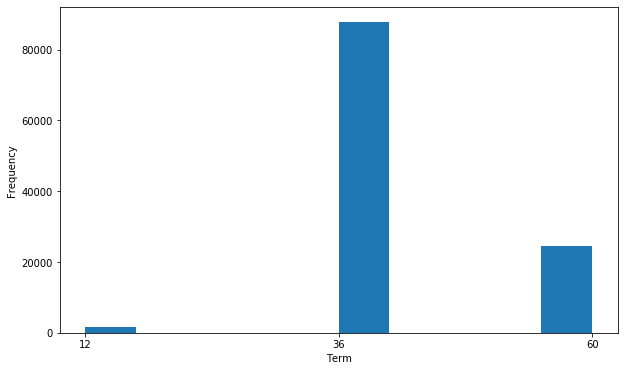

In [6]:
# We'll use a histogram for this being a discrete variable
plt.figure(figsize=(10, 6))
plt.hist(loans.Term)
plt.xticks(ticks=[12, 36, 60], labels=['12', '36', '60'])
plt.xlabel('Term')
plt.ylabel('Frequency');

We can see from the above plot that there are three durations people can have a loan for which are 12, 36 & 60 months and that the most popular of the three is the 36 months.

> Let's now explore the LoanStatus feature:

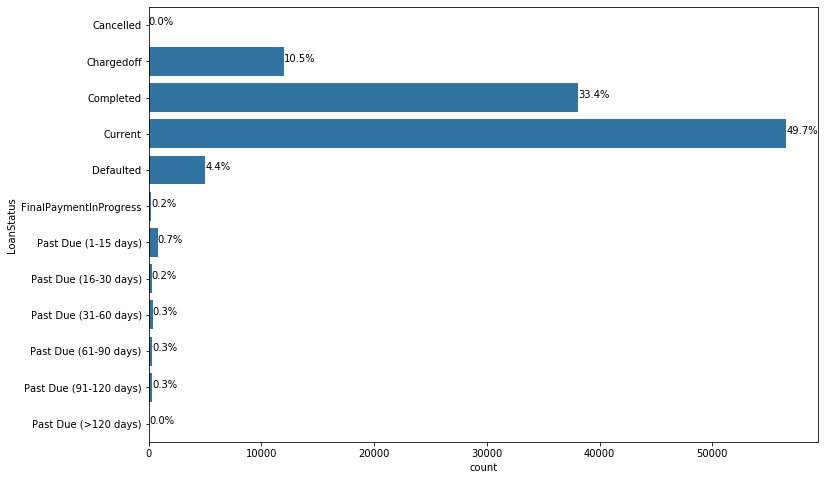

In [7]:
ax = plt.figure(figsize=(12, 8))
base_color = sb.color_palette()[0]
ax = sb.countplot(data=loans, y='LoanStatus', color=base_color)
total = len(loans.LoanStatus)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

We can see from the above plot that the majority of the loans in the dataset fall in the categories of Current, Completed, Chargedoff & Defaulted.

> Let's now explore the distibution of the EstimatedEffectiveYield.

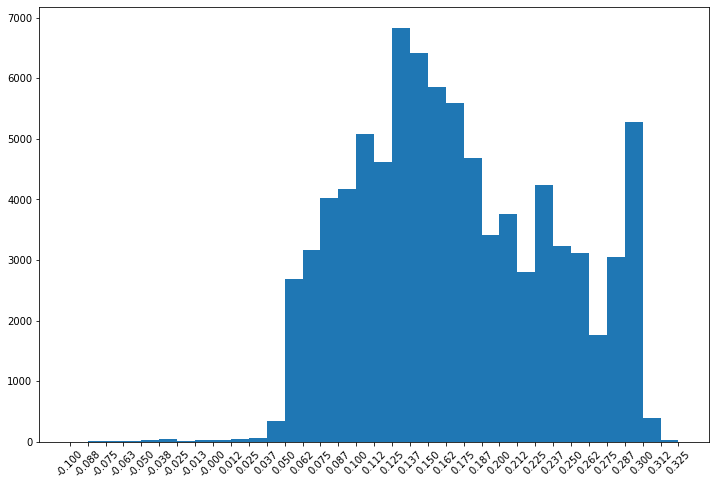

In [8]:
plt.figure(figsize=(12, 8))
bin_edges = np.arange(-0.1, loans.EstimatedEffectiveYield.max()+0.0125, 0.0125)
plt.hist(loans.EstimatedEffectiveYield, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{:.3f}'.format(v) for v in bin_edges], rotation=45);

We can see from the above plot that it's multi-modal with peaks around 0.137, 0.237 and 0.3.

> Let's now explore the distibution of the BorrowerAPR.

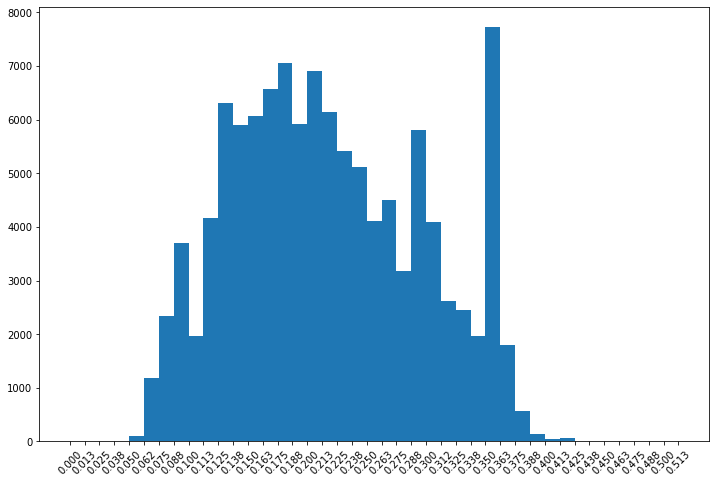

In [9]:
plt.figure(figsize=(12, 8))
bin_edges = np.arange(0, loans.BorrowerAPR.max()+0.0125, 0.0125)
plt.hist(loans.BorrowerAPR, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{:.3f}'.format(v) for v in bin_edges], rotation=45);

We can see from the above plot that it's multi-modal with peaks around 0.125, 0.188, 0.213, 0.288 and 0.350.

> Let's now explore the distibution of the BorrowerRate.

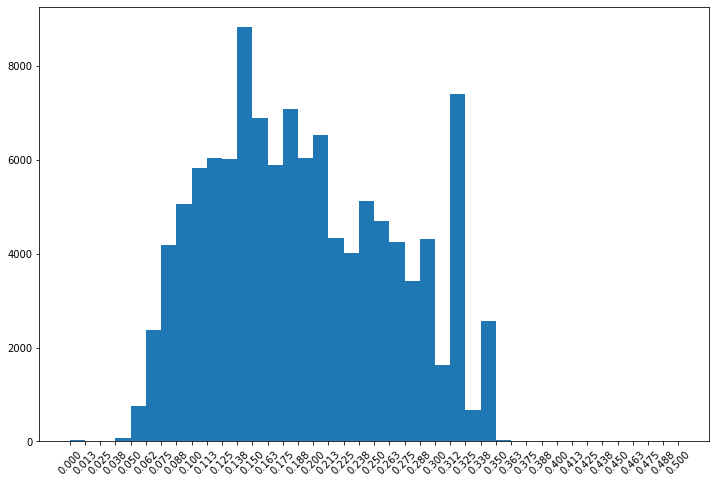

In [10]:
plt.figure(figsize=(12, 8))
bin_edges = np.arange(0, loans.BorrowerRate.max()+0.0125, 0.0125)
plt.hist(loans.BorrowerRate, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{:.3f}'.format(v) for v in bin_edges], rotation=45);

Looks multi-modal as well with even more peaks.

> Let's now explore the ProsperRating (Alpha). Being a categorical ordinal variable, we'll sort the ratings to get a meaningful plot.

In [11]:
loans['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

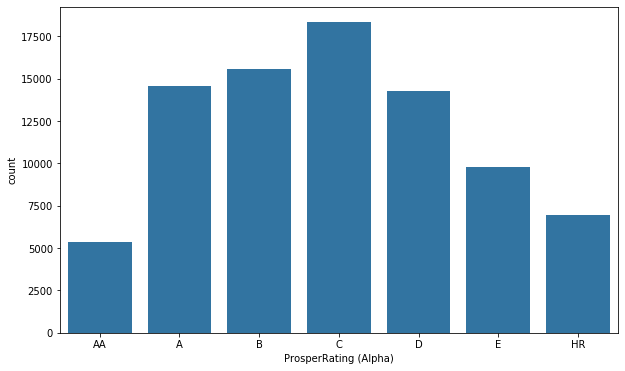

In [12]:
plt.figure(figsize=(10, 6))
sb.countplot(loans['ProsperRating (Alpha)'], color=base_color, 
             order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);

We notice from the above plot that the ratings follow a normal distribution with the most common rating being C.

> Let's now explore the ProsperScore feature. Being a categorical ordinal feature, we'll sort the ratings to get a meaningful plot.

In [13]:
loans.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

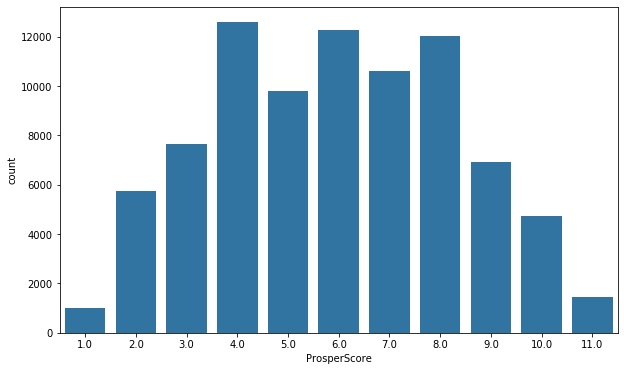

In [14]:
plt.figure(figsize=(10, 6))
sb.countplot(loans.ProsperScore, color=base_color);

We can see from the above plot that the scores have a multi-modal distribution with most frequent scores being 4,6, 8 & 7.

> Let's now explore ListingCategory. The categories in the dataset are represented as numbers instead of names. We'll replace each number with its corresponding category to have a meaningful plot.

In [15]:
loans['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [16]:
listing_cats = {0 : 'Not Available', 
                1 : 'Debt Consolidation', 
                2 : 'Home Improvement', 
                3 : 'Business', 
                4 : 'Personal Loan', 
                5 : 'Student Use', 
                6 : 'Auto', 
                7 : 'Other', 
                8 : 'Baby&Adoption', 
                9 : 'Boat', 
                10 : 'Cosmetic Procedure', 
                11 : 'Engagement Ring', 
                12 : 'Green Loans', 
                13 : 'Household Expenses', 
                14 : 'Large Purchases', 
                15 : 'Medical/Dental', 
                16 : 'Motorcycle', 
                17 : 'RV', 
                18 : 'Taxes', 
                19 : 'Vacation', 
                20 : 'Wedding Loans'}

In [17]:
loans['ListingCategory (literal)'] = loans['ListingCategory (numeric)'].replace(to_replace=listing_cats)

In [18]:
loans['ListingCategory (literal)'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory (literal), dtype: int64

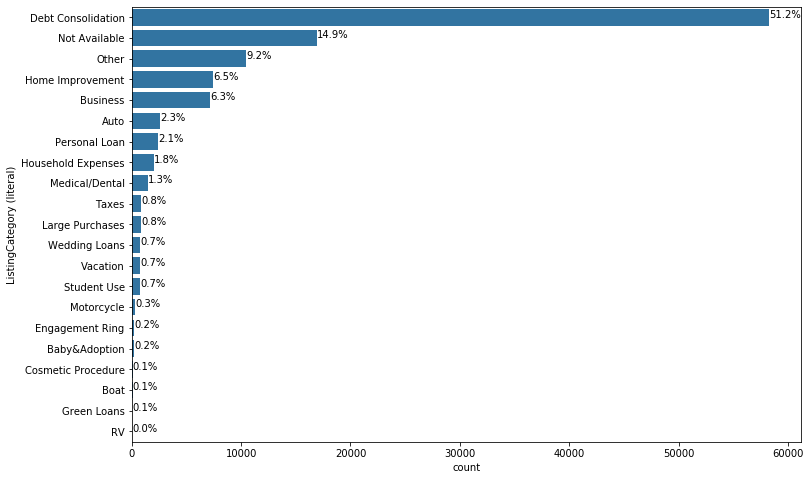

In [19]:
order = loans['ListingCategory (literal)'].value_counts().index
ax = plt.figure(figsize=(12,8))
ax = sb.countplot(data=loans, y='ListingCategory (literal)', color=base_color, 
                  order=order)
#plt.yticks(ticks=order, labels=[listing_cats[i] for i in order])
total = len(loans['ListingCategory (literal)'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

We can see from the above plot that the most frequent category is **Debt Consolidation** which is ironic as it says that people often take loans to pay for previous loans they had.

> We'll now explore the Occupation feature.

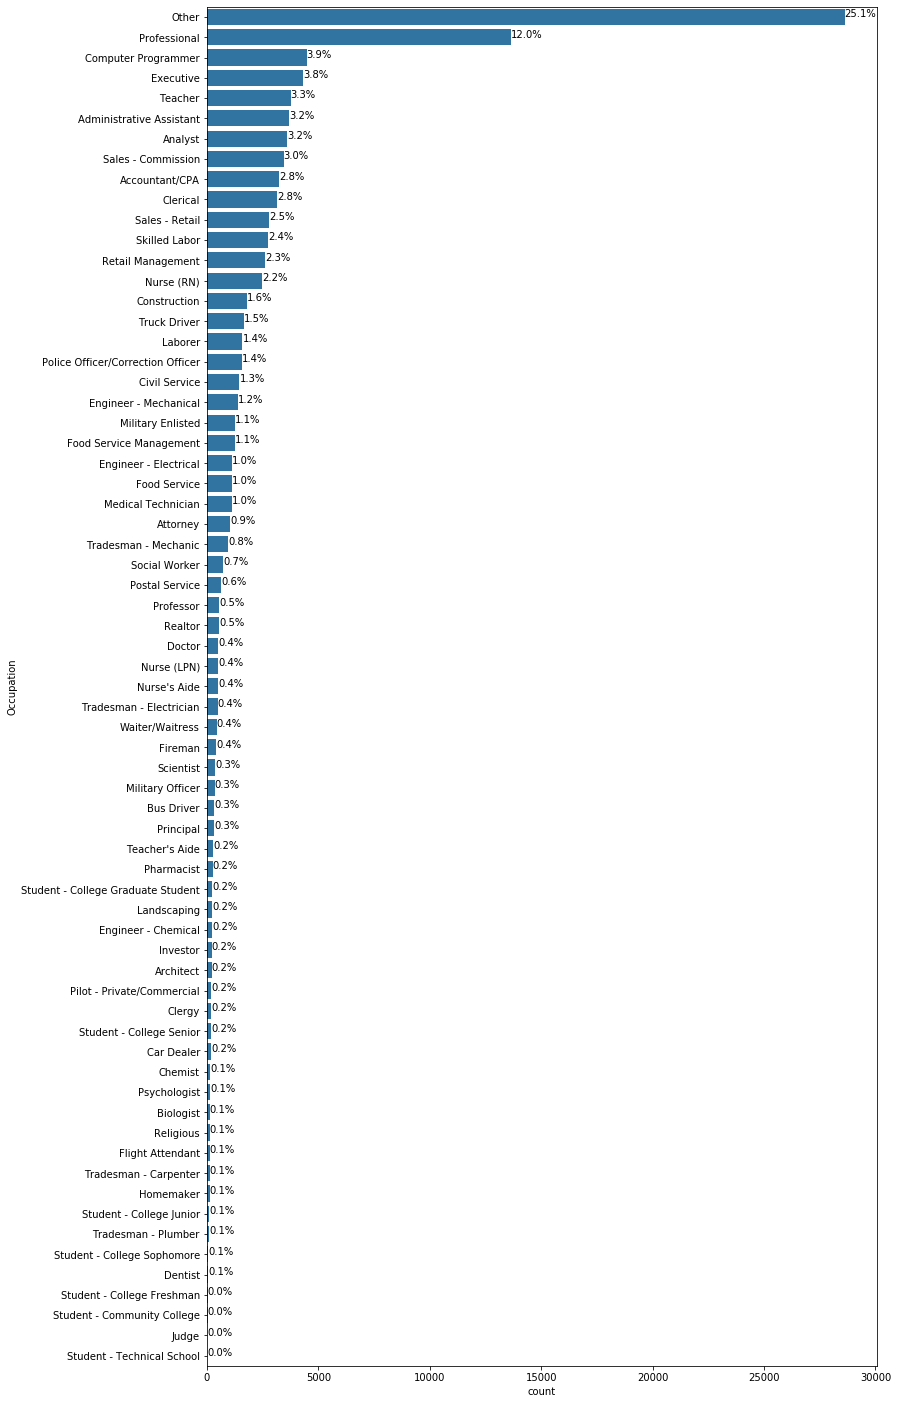

In [20]:
ax = plt.figure(figsize=(12,25))
ax = sb.countplot(data=loans, y='Occupation', color=base_color,
                 order=loans.Occupation.value_counts().index)
total = len(loans.Occupation)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

The above plot tells us that the majority of the occupations are not defined or left as other.

> Let's explore the EmploymentStatus

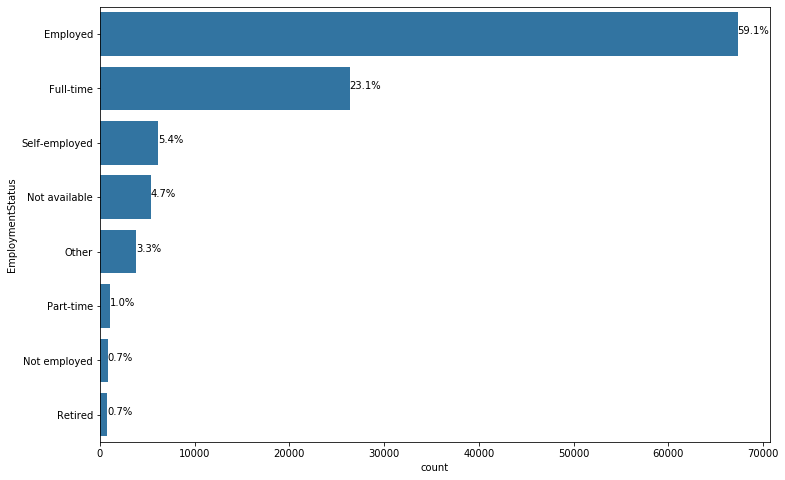

In [21]:
ax = plt.figure(figsize=(12,8))
ax = sb.countplot(data=loans, y='EmploymentStatus', color=base_color,
                 order=loans.EmploymentStatus.value_counts().index)
total = len(loans.EmploymentStatus)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

The above plot tells us that the majority of the borrowers are employed on Full-time basis.

> Let's explore the EmploymentStatusDuration

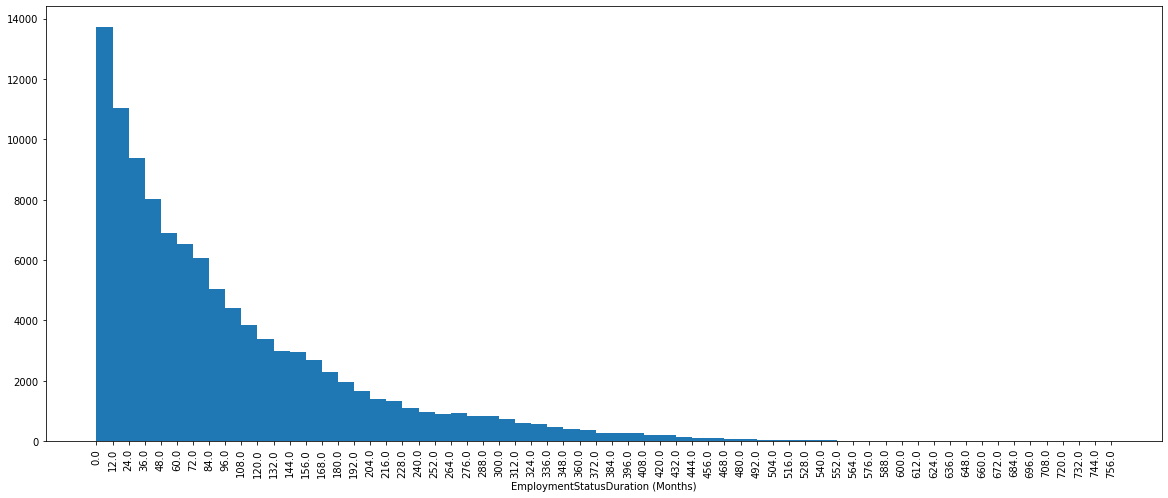

In [22]:
plt.figure(figsize=(20, 8))
bin_edges = np.arange(0, loans.EmploymentStatusDuration.max()+12, 12)
plt.hist(loans.EmploymentStatusDuration, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{}'.format(v) for v in bin_edges], rotation=90)
plt.xlabel('EmploymentStatusDuration (Months)');

We can see from the above plot that the EmploymentStatusDuration is highly skewed to the right, which means that the majority of the population of the borrowers in the dataset have had their EmploymentStatus for shorter periods of time.

> Let's explore the IsBorrowerHomeowner feature

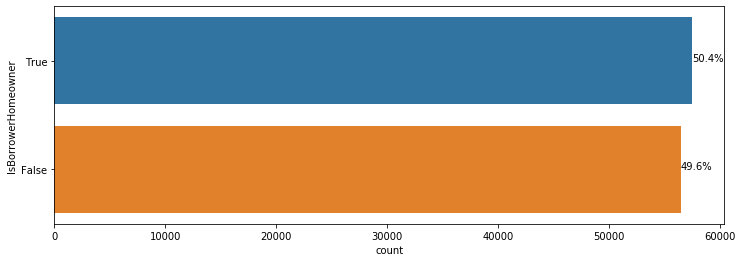

In [23]:
ax = plt.figure(figsize=(12,4))
ax = sb.countplot(data=loans, y='IsBorrowerHomeowner',
                 order=loans.IsBorrowerHomeowner.value_counts().index)
total = len(loans.IsBorrowerHomeowner)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

The above plot tells us that slightly more borrowers are home owners.

> Let's explore DebtToIncomeRatio

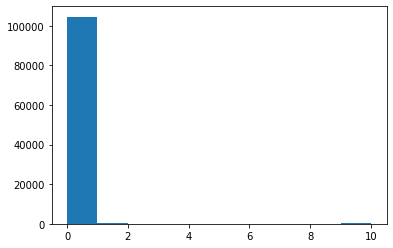

In [24]:
plt.hist(loans.DebtToIncomeRatio);

In [25]:
loans.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

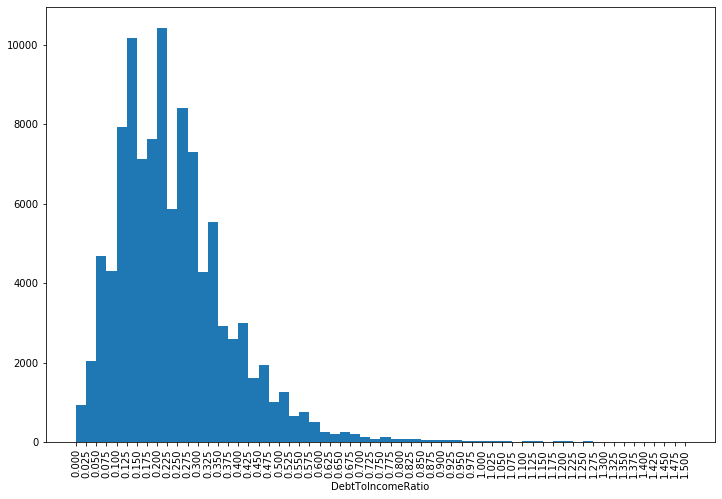

In [26]:
# We can see from the above that the majority of the ratios fall in the range 0 : 1
# Hence, we'll zoom in on this range to see the distibution of the ratios
plt.figure(figsize=(12, 8))
bin_edges = np.arange(0, 1.5+0.025, 0.025)
plt.hist(loans.DebtToIncomeRatio, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{:.3f}'.format(v) for v in bin_edges], rotation=90)
plt.xlabel('DebtToIncomeRatio');

We can see from the above plot that the distribution is multi-modal with several peaks. 

We'll here zoom in on the other end of the plot to view the distribution as well.

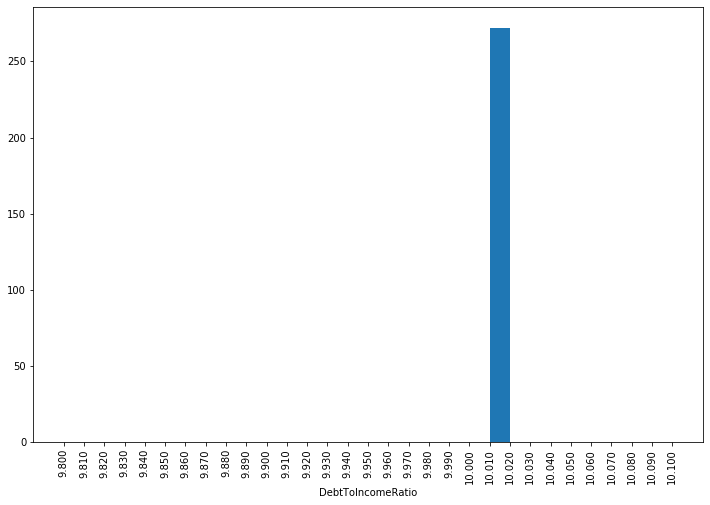

In [27]:
plt.figure(figsize=(12, 8))
bin_edges = np.arange(9.8, 10.1+0.01, 0.01)
plt.hist(loans.DebtToIncomeRatio, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{:.3f}'.format(v) for v in bin_edges], rotation=90)
plt.xlabel('DebtToIncomeRatio');

We notice here that the values that fall in this range are the ones at 10.01 which is the cap value for any debt to income ratio larger than 10. Relative to the population of the borrowers in the dataset, there are quite few with such high debt to income ratio which makes sense as this ratio needs to be small for them to be able to pay back the loan, hence we find the majority of the population fall in the range 0 to 1.

> Let's explore the IncomeVerifiable feature

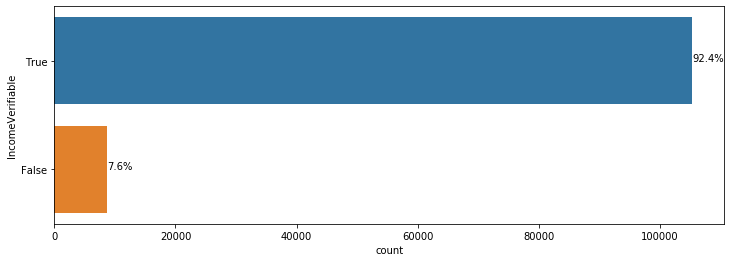

In [28]:
ax = plt.figure(figsize=(12,4))
ax = sb.countplot(data=loans, y='IncomeVerifiable',
                 order=loans.IncomeVerifiable.value_counts().index)
total = len(loans.IncomeVerifiable)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

The above plot tells us that the majority of the borrowers have a verifiable source of income.

> Let's explore the StatedMonthlyIncome

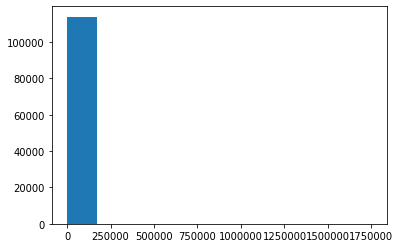

In [29]:
plt.hist(loans.StatedMonthlyIncome);

In [30]:
loans.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

Given that the maximum is way far from all other values, we'll use a log scale.

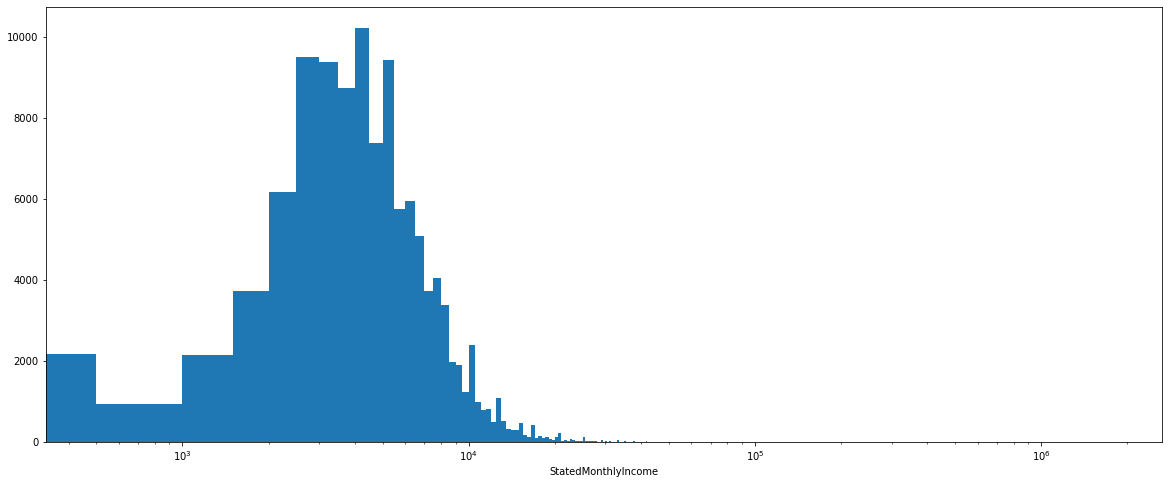

In [31]:
plt.figure(figsize=(20, 8))
bin_edges = np.arange(0, loans.StatedMonthlyIncome.max()+500, 500)
plt.hist(loans.StatedMonthlyIncome, bins=bin_edges)
plt.xscale('log')
plt.xlabel('StatedMonthlyIncome');

From the above plot, we can see that the distibution is highly skewed to the right, and that the majority of the population of the borrowers have a monthly income that's below 10,000.

> Let's explore the LoanOriginalAmount feature

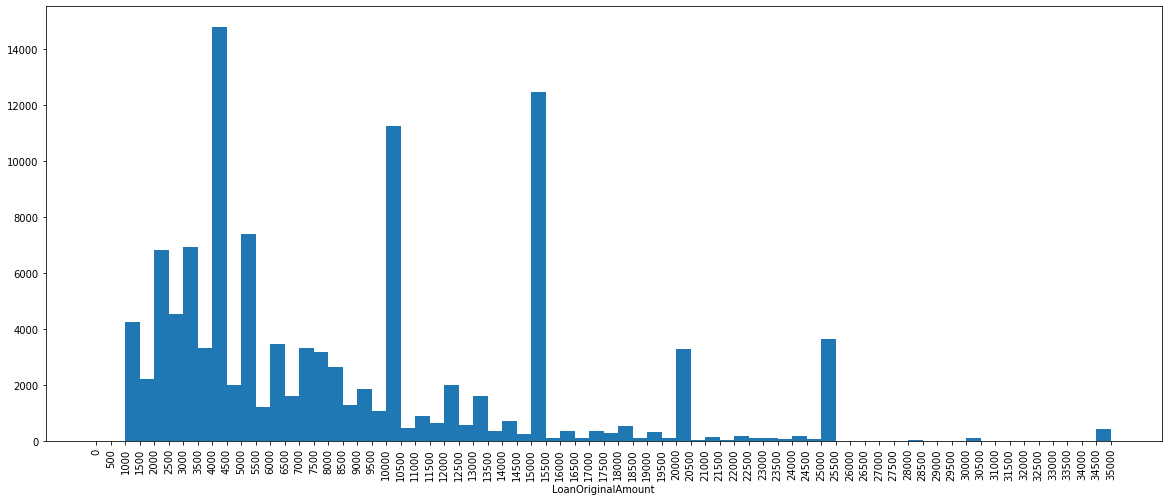

In [32]:
plt.figure(figsize=(20, 8))
bin_edges = np.arange(0, loans.LoanOriginalAmount.max()+500, 500)
plt.hist(loans.LoanOriginalAmount, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{}'.format(v) for v in bin_edges], rotation=90)
plt.xlabel('LoanOriginalAmount');

From the above plot we can see the distribution is multi-modal with top 4 peaks at 4000, 15000, 10000 & 5000.

> Let's explore LoanOriginationQuarter

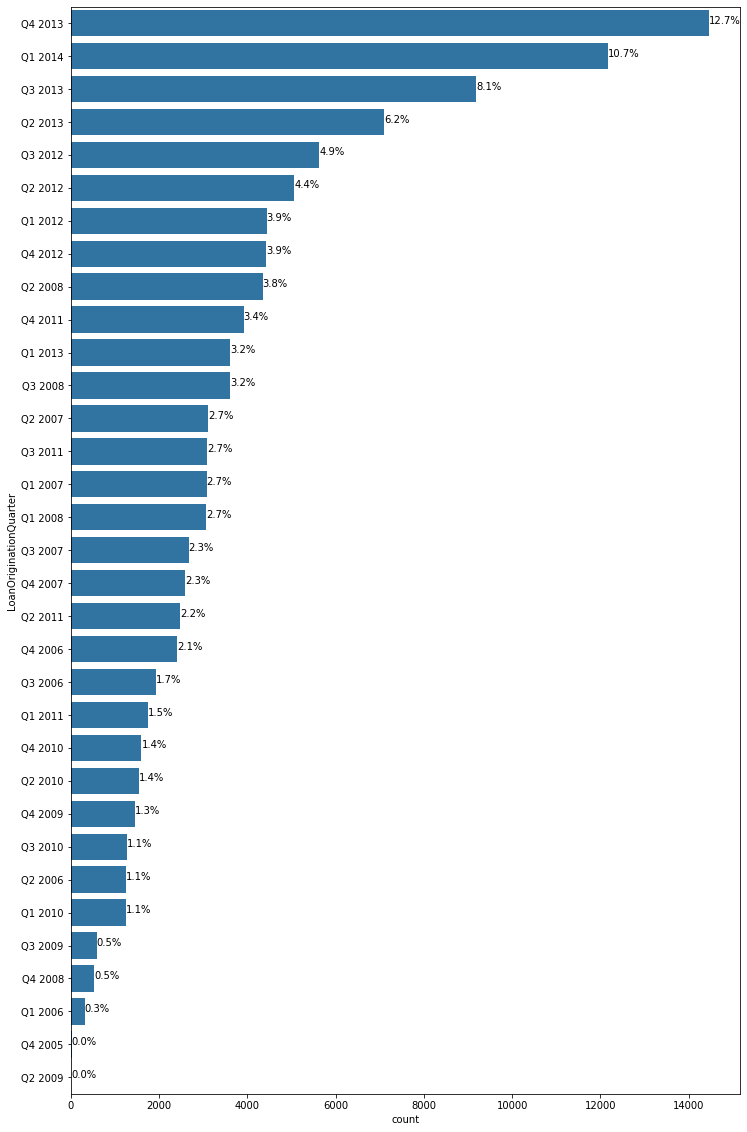

In [33]:
ax = plt.figure(figsize=(12,20))
ax = sb.countplot(data=loans, y='LoanOriginationQuarter', color=base_color,
                 order=loans.LoanOriginationQuarter.value_counts().index)
total = len(loans.LoanOriginationQuarter)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

We see from the above plot that the majority of the loans in the dataset were originated in the period starting from the 2nd quarter of 2013 till 2014's 1st quarter.

> Let's explore the MonthlyLoanPayment

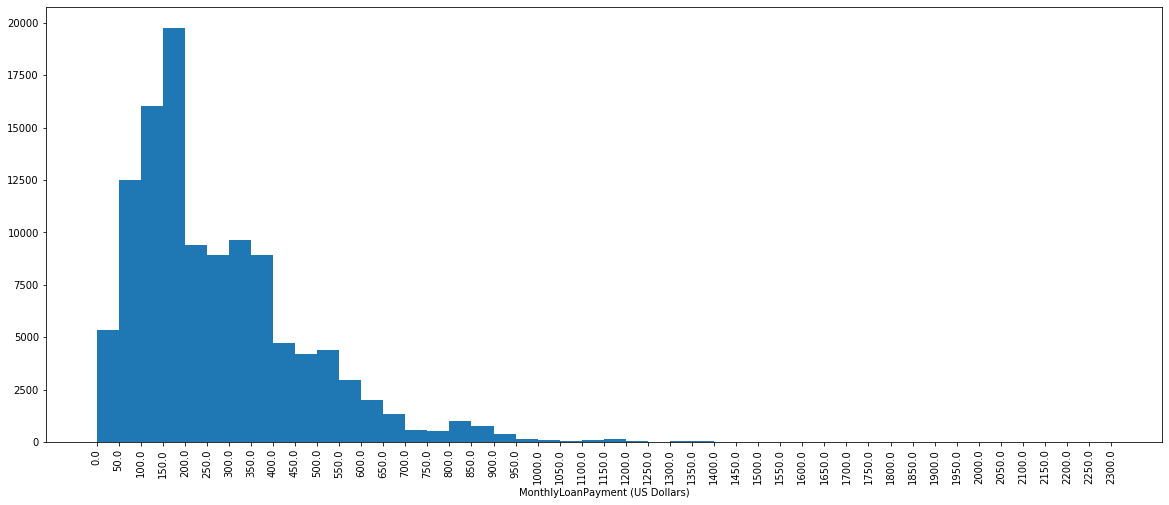

In [34]:
plt.figure(figsize=(20, 8))
bin_edges = np.arange(0, loans.MonthlyLoanPayment.max()+50, 50)
plt.hist(loans.MonthlyLoanPayment, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{}'.format(v) for v in bin_edges], rotation=90)
plt.xlabel('MonthlyLoanPayment (US Dollars)');

We can see that the distribution is highly skewed to the right meaning that the majority of the MonthlyLoanPayment fall below 400 USD.

> Let's explore the Recommendations

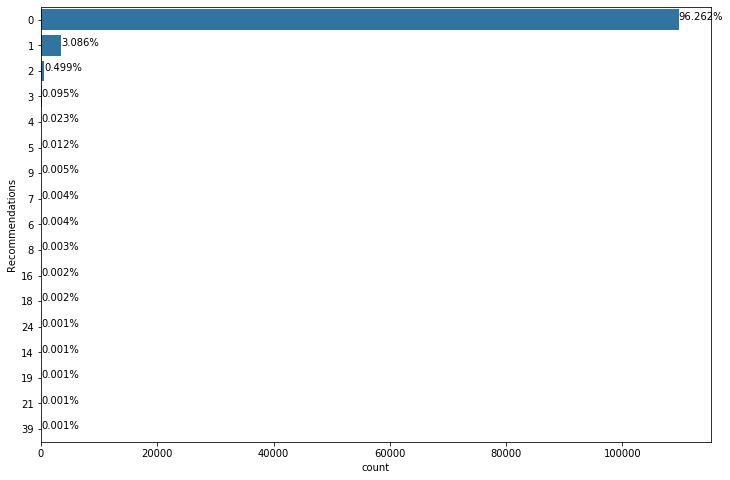

In [35]:
ax = plt.figure(figsize=(12,8))
ax = sb.countplot(data=loans, y='Recommendations', color=base_color,
                 order=loans.Recommendations.value_counts().index)
total = len(loans.Recommendations)
for p in ax.patches:
        percentage = '{:.3f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

We can see from the above plot that the majority of the borrowers in the dataset have 0 recommendations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The LoanStatus variable is a Categorical Nominal variable. We concluded from its distribution that the Current, Completed, Chargedoff & Defaulted are the most frequent status in the dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The StatedMonthlyIncome variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked highly skewed to the right, and that the majority of the borrowers in the dataset have a monthly income that's below 10,000.

## Bivariate Exploration

To start off with, we will look at the pairwise correlations present between features in the data.

In [36]:
num_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatusDuration', 
            'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categ_vars = ['Term', 'LoanStatus', 'ProsperRating (Alpha)', 'ProsperScore', 
              'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable', 
              'LoanOriginationQuarter', 'Recommendations']

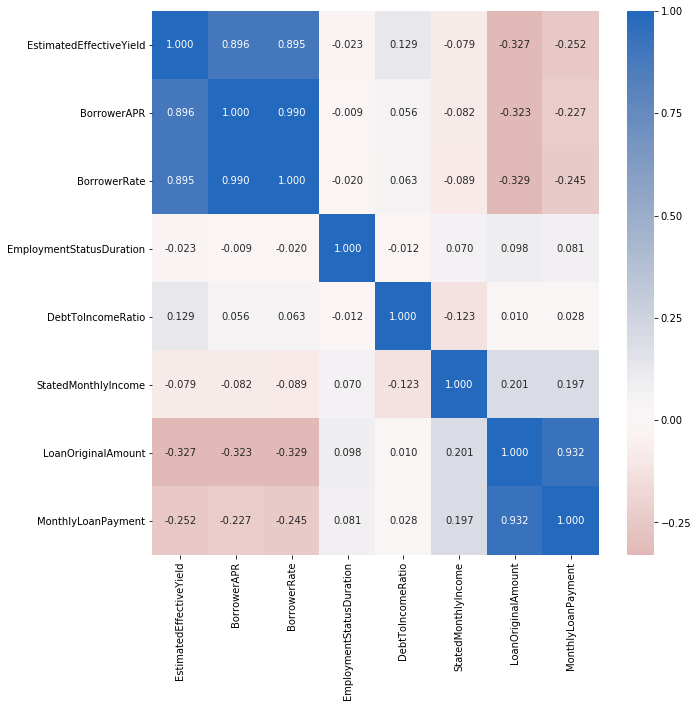

In [37]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(loans[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

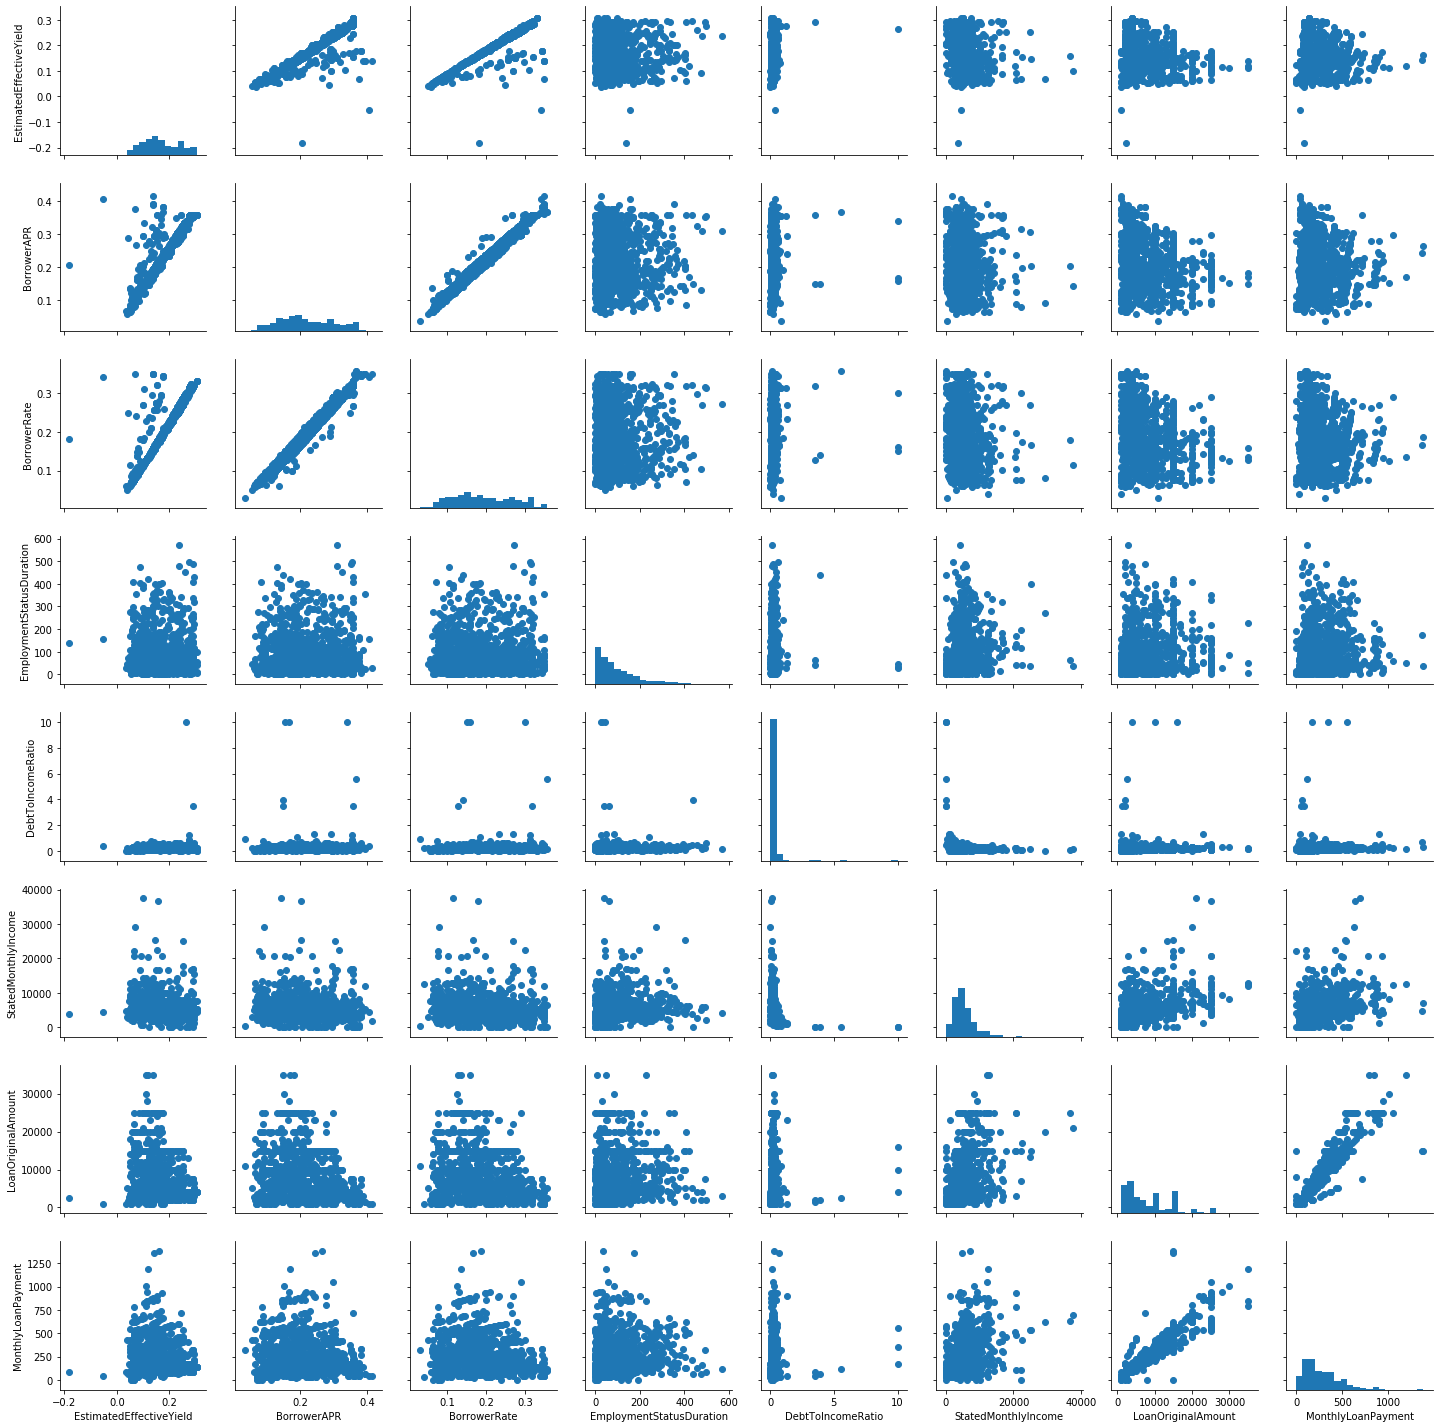

In [38]:
# plot matrix: sample 1000 loans so that plots are clearer and they render faster
samples = np.random.choice(loans.shape[0], 1000, replace = False)
loans_samp = loans.loc[samples,:]

g = sb.PairGrid(data = loans_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

As expected, the EstimatedEffectiveYield, BorrowerAPR and BorrowerRate are all highly correlated with one another. Also, the LoanOriginalAmount and the MonthlyLoanPayment are highly correlated.

Let's move on to exploring how BorrowerRate and LoanOriginalAmount correlate with the LoanStatus.

<Figure size 1440x1440 with 0 Axes>

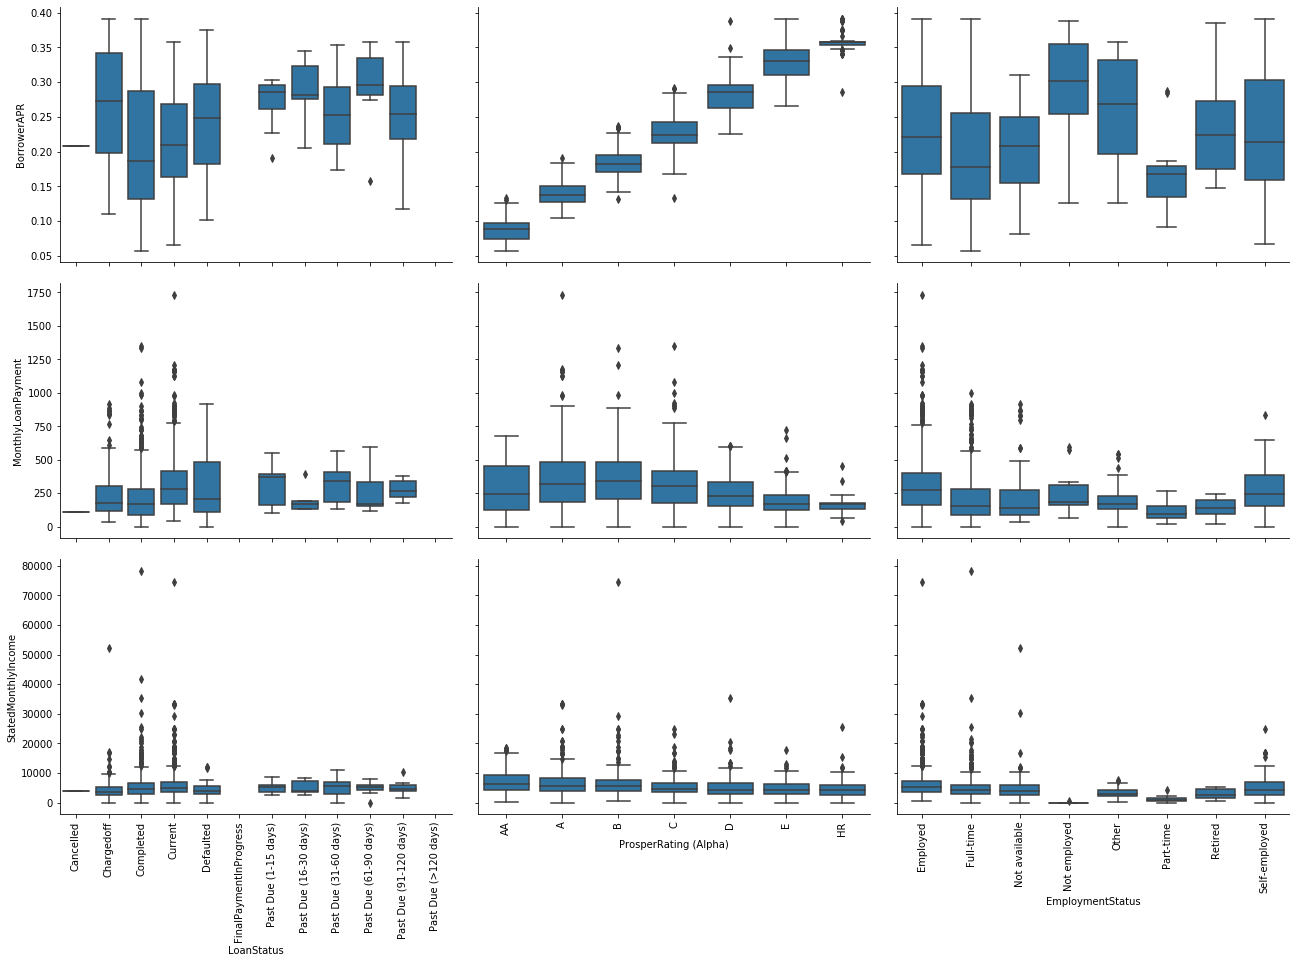

In [39]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(loans.shape[0], 2000, replace = False)
loans_samp = loans.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90);

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = loans_samp, y_vars = ['BorrowerAPR', 'MonthlyLoanPayment', 'StatedMonthlyIncome'], 
                x_vars = ['LoanStatus', 'ProsperRating (Alpha)', 'EmploymentStatus'],
                size = 4, aspect = 1.5)
g.map(boxgrid)
plt.show();

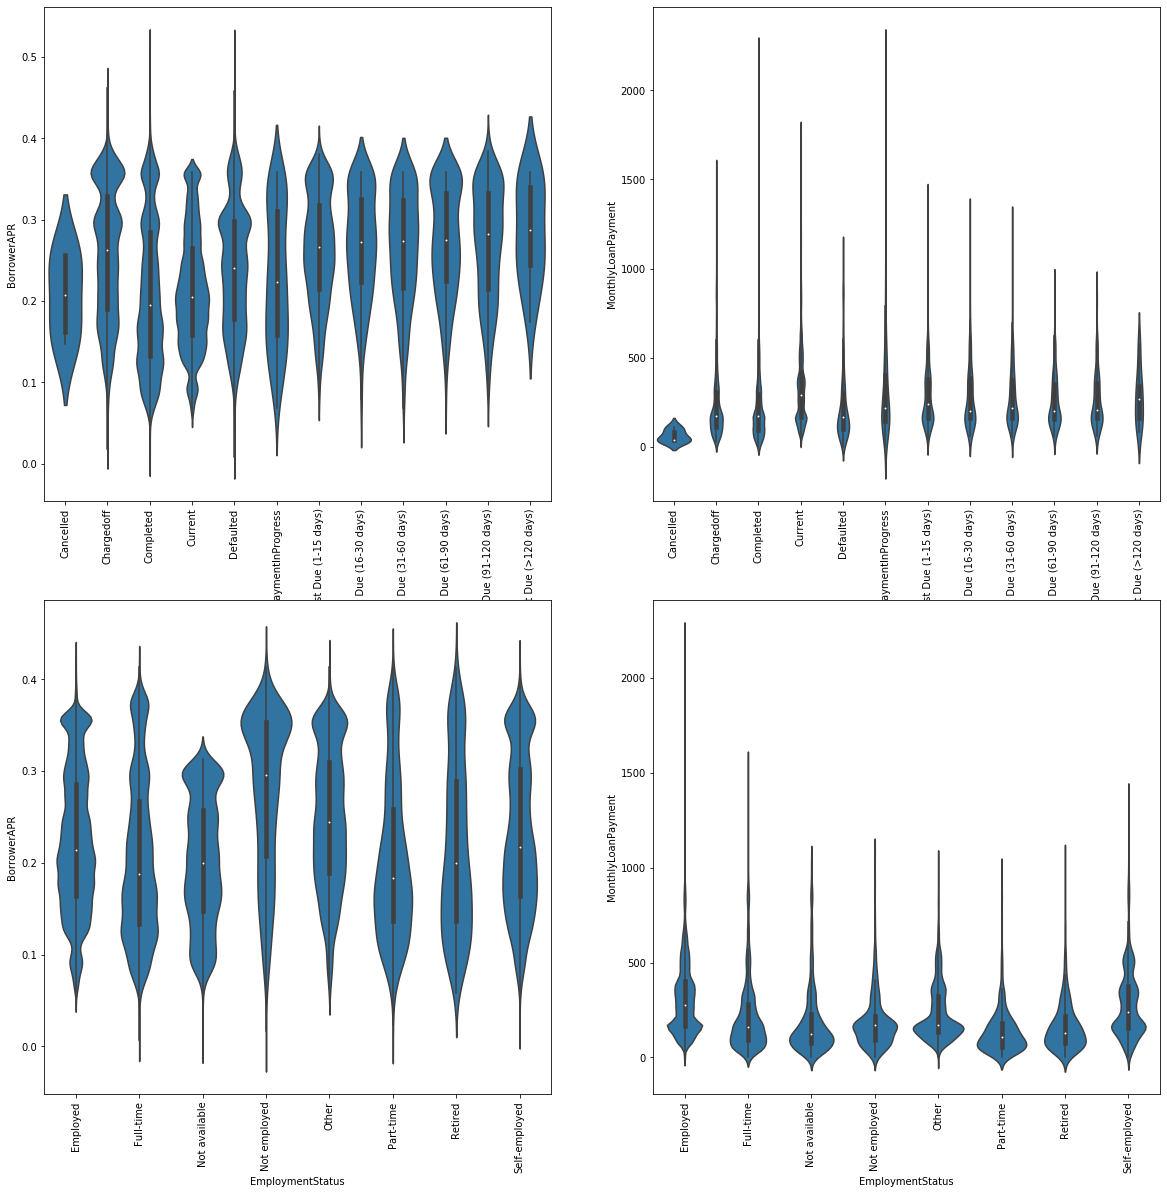

In [40]:
# we'll plot the categorical variables of interest against BorrowerAPR and MonthlyLoanPayment again,
# this time with the full data
fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [20,20])
categoric_vars = ['LoanStatus', 'EmploymentStatus']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = loans, x = var, y = 'BorrowerAPR', ax = ax[i,0],
               color = base_color)
    ax[i,0].set_xticklabels(labels=loans[var].value_counts().sort_index().index, rotation=90)
    sb.violinplot(data = loans, x = var, y = 'MonthlyLoanPayment', ax = ax[i,1],
               color = base_color)
    ax[i,1].set_xticklabels(labels=loans[var].value_counts().sort_index().index, rotation=90)
    
plt.show();

From the above plot, we can see that loans with Chargedoff & Defaulted status tend to have a higher BorrowerAPR on average. We can see also that the BorrowerAPR is least for those with the highest ProsperRating, AA. And also that the BorrowerAPR tends to be highest for those with the lowest ProsperRating, HR. We can also see that borrowers with Part-time EmploymentStatus have the lowest MonthlyLoanPayment on average & similarly those who have the lowest ProsperRating also have the lowest MonthlyLoanPayment. We can also see that the defaulted & charged off loans have the lowest StatedMonthlyIncome on average.

As we concluded earlier that BorrowerAPR has a strong positive correlation with BorrowerRate and EstimateEffectiveYield, so whatever applies to the BorrowerAPR would apply to the BorrowerRate and the EstimateEffectiveYield as well. Similarly, the MonthlyLoanPayment is positively correlated with the LoanOriginalAmount so the relationships depicted for the MonthlyLoanPayment would also be true for the LoanOriginalAmount.

> Now, Let's look at the relationships between some of the categorical variables of interest that we have with the LoanStatus

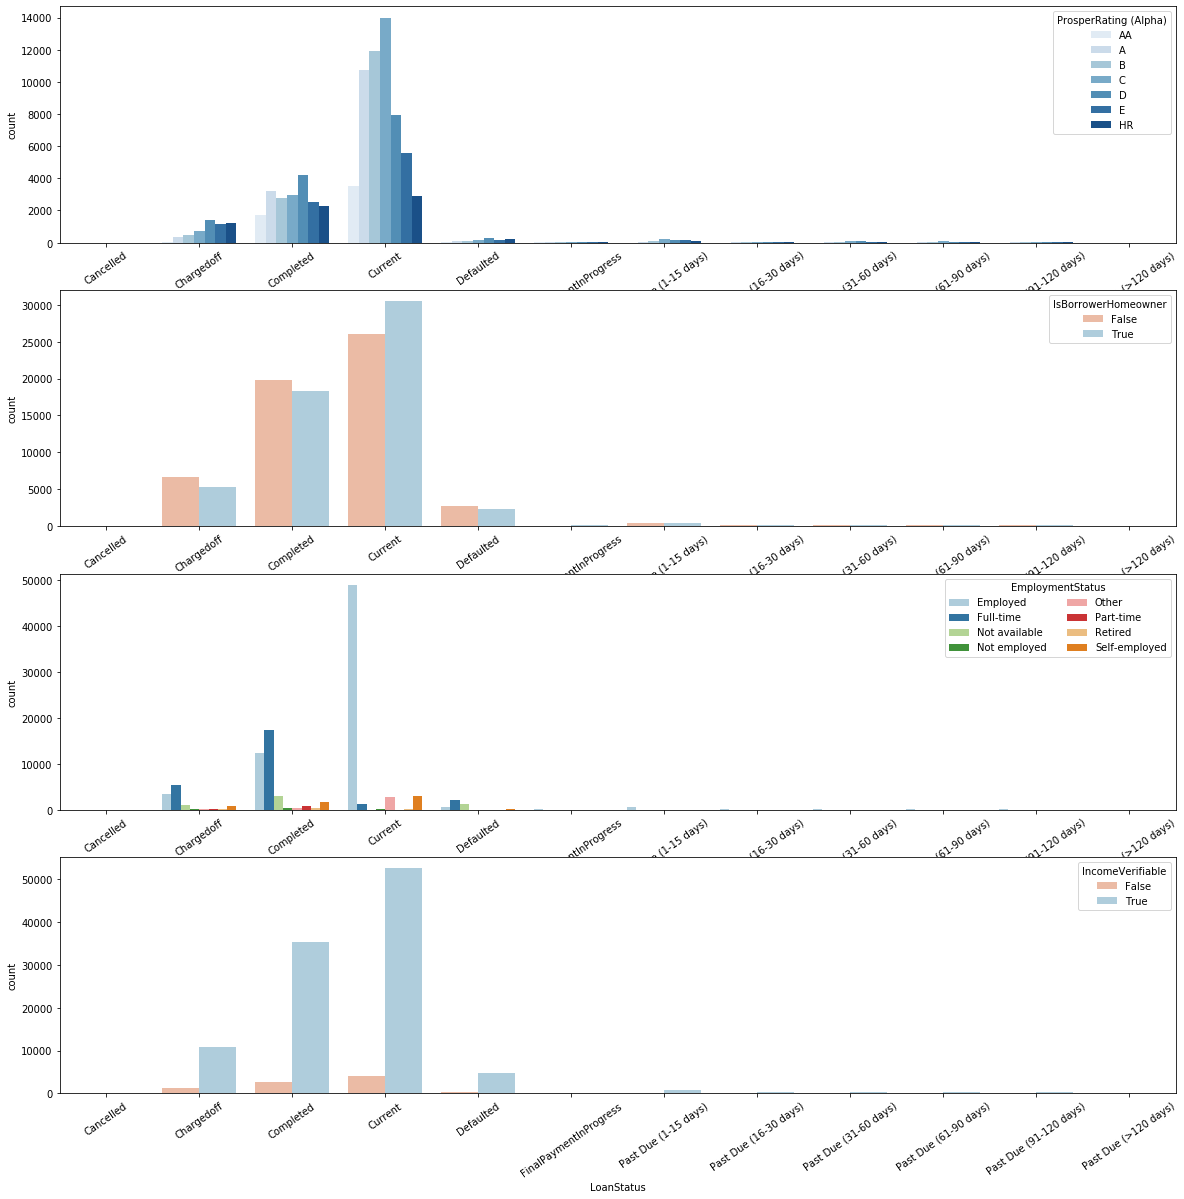

In [48]:
# since there's only four subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 20])

# subplot 1: LoanStatus vs ProsperRating
plt.subplot(4, 1, 1)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.xticks(rotation=35)
plt.legend(loc = 'upper right', title='ProsperRating (Alpha)');

# subplot 2: LoanStatus vs. IsBorrowerHomeowner
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'RdBu')
plt.xticks(rotation=35);

# subplot 3: LoanStatus vs. EmploymentStatus
ax = plt.subplot(4, 1, 3)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Paired')
ax.legend(loc = 1, ncol = 2, title='EmploymentStatus') # re-arrange legend to remove overlapping
plt.xticks(rotation=35);

# subplot 4: LoanStatus vs. IncomeVerifiable
ax = plt.subplot(4, 1, 4)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'IncomeVerifiable', palette = 'RdBu')
plt.xticks(rotation=35);

plt.show();

From the above plot we can say that most of the Defaulted and Chargedoff loans are for borrowers with a low ProsperRating D, E or HR. Also, we see that on average Defaulted and Chargedoff loans tend to be for borrowers who are not home owners. 

Also, we find that most of the Defaulted and Chargedoff loans are for borrowers who are Employed and Full-time as well, which might sound counter-intuitive at first, but as per our univarite exploration, we can see that around 87.6% of the borrowers in the dataset are either Employed, Full-time or Self-employed.

Last but not least, since the majority of the borrowers in the dataset have a verifiable source of income as revealed in the univariate analysis, we find that most of the borrowers in any category of LoanStatus had a verifiable source of income.

> Finally, let's look at relationships between different pairs of Categorical variables

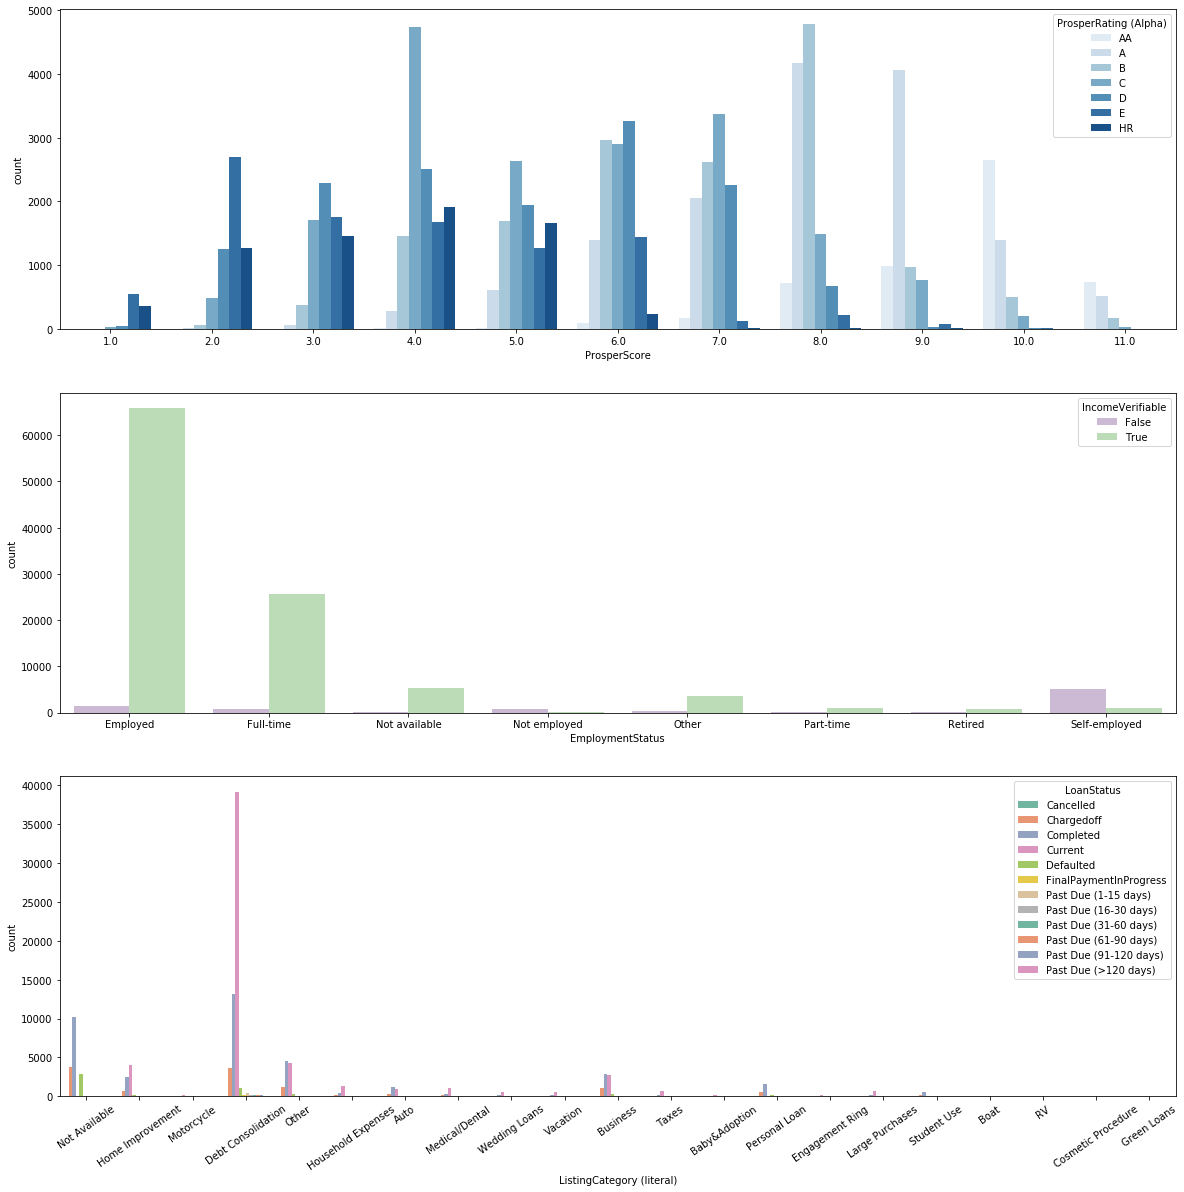

In [42]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 20])

# subplot 1: ProsperScore vs. ProsperRating (Alpha)
plt.subplot(3, 1, 1)
sb.countplot(data = loans, x = 'ProsperScore', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.legend(loc = 'upper right', title='ProsperRating (Alpha)');

# subplot 2: EmploymentStatus vs. IncomeVerifiable
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'IncomeVerifiable', palette = 'PRGn');

# subplot 3: ListingCategory vs. LoanStatus
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loans, x = 'ListingCategory (literal)', hue = 'LoanStatus', palette = 'Set2')
ax.legend(loc = 'upper right', title='LoanStatus') # re-arrange legend to remove overlapping
plt.xticks(rotation=35);


plt.show();

From the above plot we can see that, as expected, borrowers with high ProsperRatings tend to have high ProsperScores on average.

Also, as expected, the majority of the borrowers who are Employed or Full-time have a verifiable source of income, meanwhile most of the Self-employed borrowers have no verifiable source of income.

Last but not least, comparing different listing categories, we find that most of the defaulted and charged off loans are listed as Not Available, that could be either due to missing data or that the borrower didn't provide a reason for the loan.

### Talk about some of the relationships you observed in this part of the investigation. How did the features of interest vary with other features in the dataset?

We saw that Pastdue, Defaulted and Chargedoff loans tend to have higher BorrowerAPR on average. Also that most of the Defaulted and Chargedoff loans are for borrowers with low ProsperRating (Alpha) and relatively low StatedMonthlyIncome.


### Did you observe any interesting relationships between the other features?

We saw strong correlations between variables like BorrowerAPR, BorrowerRate and EstimatedEffectiveYield also between MonthlyLoanPayment and LoanOriginalAmount and also between ProsperScore and ProsperRating (Alpha).


## Multivariate Exploration

The main thing we will explore in this part of the analysis is how the BorrowerAPR and the ProsperRating (Alpha) affect the LoanStatus.

<Figure size 1440x1440 with 0 Axes>

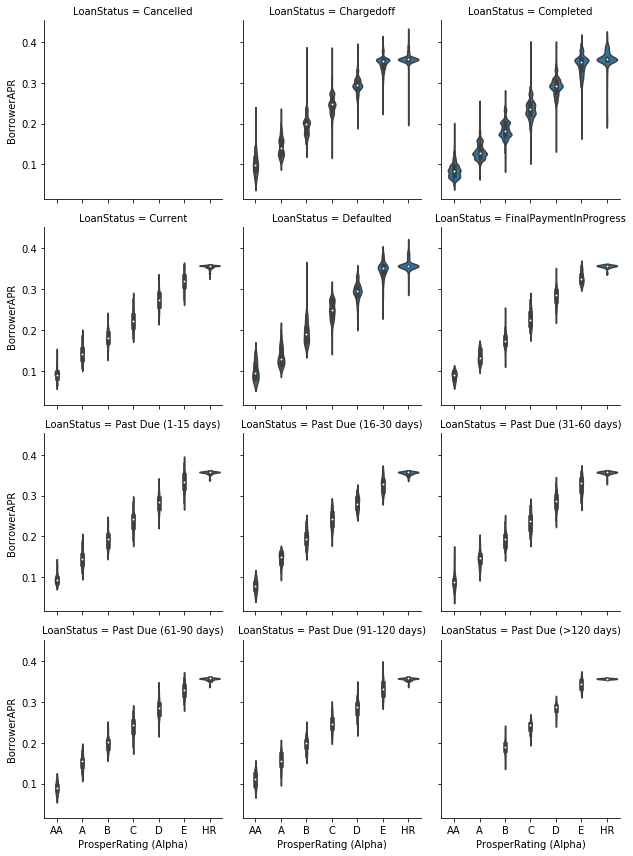

In [43]:
# create faceted violin plots on levels of the LoanStatus variable
plt.figure(figsize=(20,20))
g = sb.FacetGrid(data = loans, col = 'LoanStatus', col_wrap = 3, size = 3)
g.map(sb.violinplot, 'ProsperRating (Alpha)', 'BorrowerAPR')
g.set_xlabels('ProsperRating (Alpha)')
g.set_ylabels('BorrowerAPR')

plt.show();

I tried looking at faceted violin plots across two numberic features, but it seems like there are too many facets to look at. Perhaps a better summary can come from looking at only loans with specific status.

In [44]:
# select loans with status Defaulted, Chargedoff
loans_flag = (loans['LoanStatus'] == 'Defaulted') | (loans['LoanStatus'] == 'Chargedoff')
loans_def = loans.loc[loans_flag,:]
loans_def.shape

(17010, 82)

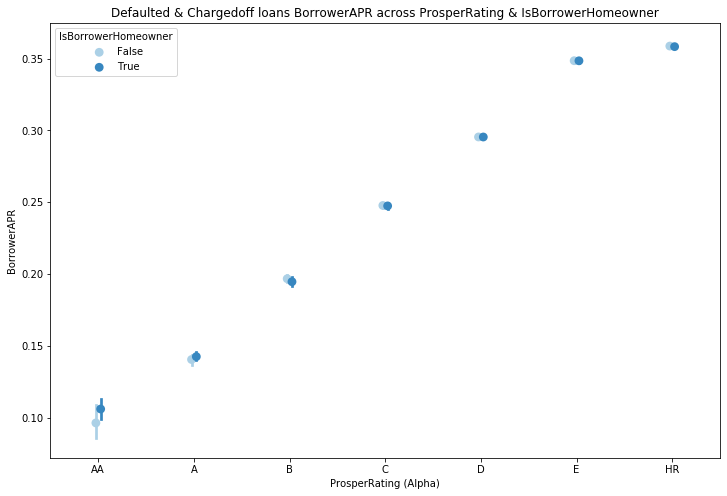

In [45]:
plt.figure(figsize = [12,8])
sb.pointplot(data = loans_def, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', 
                  palette = 'Blues', linestyles = '', dodge=True)
plt.title('Defaulted & Chargedoff loans BorrowerAPR across ProsperRating & IsBorrowerHomeowner')
plt.ylabel('BorrowerAPR')
plt.show()

The above plot makes it even clearer that with higher ProsperRatings, the BorroweAPR gets lower.

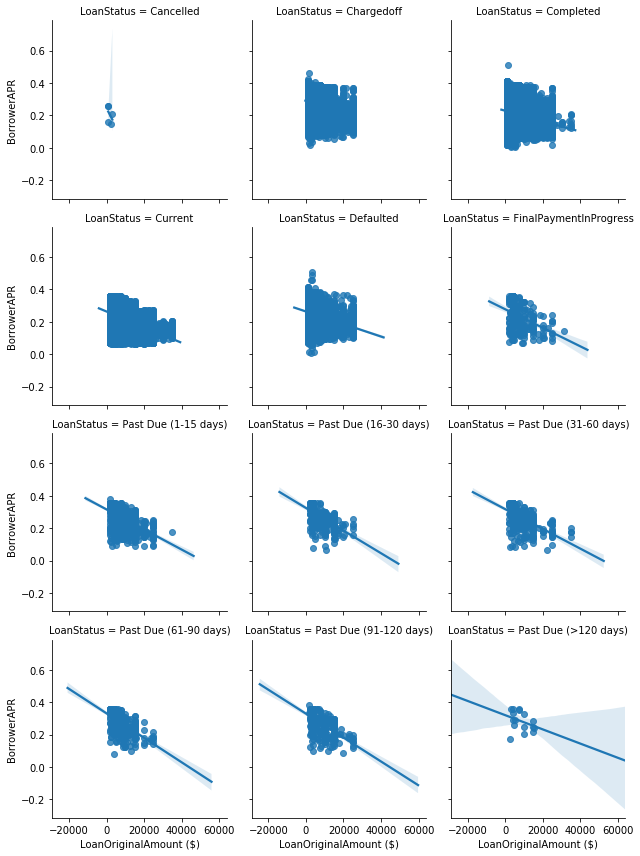

In [46]:
# create faceted scatter plots on levels of the LoanStatus variable
g = sb.FacetGrid(data = loans, col = 'LoanStatus', col_wrap = 3, size = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR')
g.set_xlabels('LoanOriginalAmount ($)')
g.set_ylabels('BorrowerAPR')

plt.show()

The above plot depicts the relationship between the BorrowerAPR and the LoanOriginalAmount and that they're negatively correlated, hence we can say that the higher the loan amount gets the lower the interest rate becomes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationship between the BorrowerAPR and the ProsperRating was carified that for borrowers with higher ProsperRating they get loans at a lower interest rate.

### Were there any interesting or surprising interactions between features?

The relationship between the BorrowerAPR and the LoanOriginalAmount was found to be negative correlation as for higher loan amounts the interest rate tends to be less and that applies for different loan statuses.